# 1. K-Means Clustering

In [212]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Cargamos y visualizamos los datos

In [213]:
data = np.load('data/data_kmeans.npz')
print(f"Type of data: {type(data)}\n")

X = data['X']
print(f"X.shape: {X.shape}\n")
print(f"{X[:5]}")

Type of data: <class 'numpy.lib.npyio.NpzFile'>

X.shape: (300, 2)

[[1.84207953 4.6075716 ]
 [5.65858312 4.79996405]
 [6.35257892 3.2908545 ]
 [2.90401653 4.61220411]
 [3.23197916 4.93989405]]


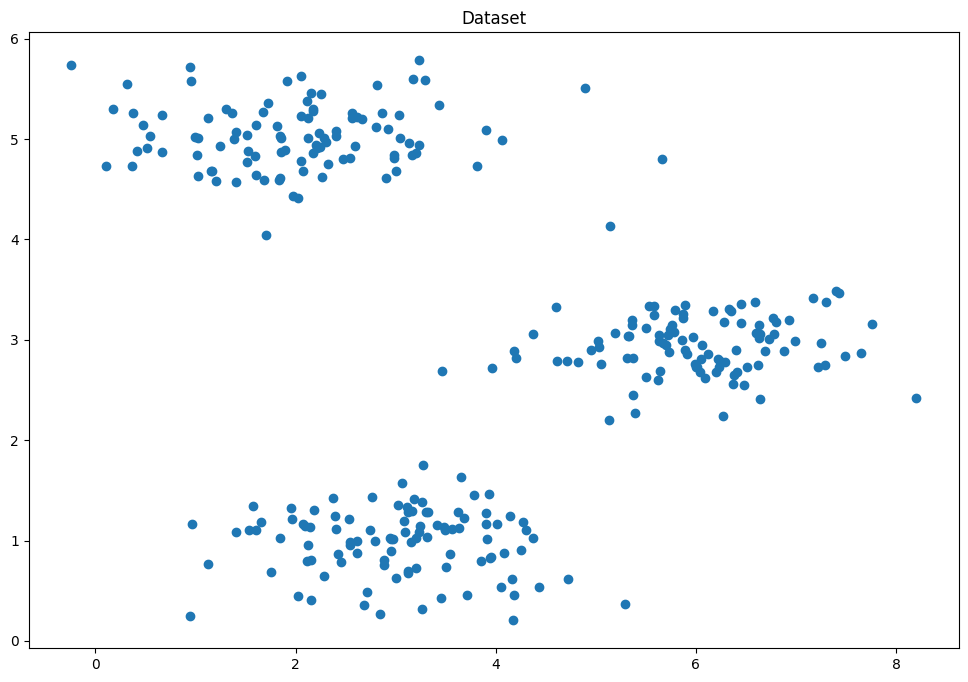

In [214]:
# Plotting the dataset
plt.scatter(X[:,0],X[:,1])
plt.title("Dataset")
plt.show()

### Preparación del algoritmo de K-Means

Establecemos los parámetros para K-Means, número de clusters y límite de iteraciones.

In [215]:
K = 3;
max_iters = 100;

A continuación preparamos las funciones necesarias para resolver el algoritmo.

Comenzamos con una función para inicializar los centroides con muestras aleatorias del dataset, la cual k muestras diferentes del dataset.

In [216]:
# Intialize the cluster centroid with unique random samples from the  dataset
def initCentroids(X,K):
    flag = True
    while flag: 
        pos = np.random.choice(X.shape[0],K,replace = False)
        centroids = X[pos]
        if np.unique(centroids,axis =0).shape[0] == K:
            flag = False
    return centroids

In [217]:
# Randomly intializing cluster centroid from the dataset
init_c = initCentroids(X,K)
print(f"Initial centroids:\n{init_c}\n")

Initial centroids:
[[0.99253246 5.01567424]
 [2.06995345 4.6846713 ]
 [3.29765181 5.59205535]]



Otra función para asignar los puntos del dataset al centroide más cercano. Se calcula la distancia de cada punto a cada centroide y se asigna al centroide más cercano.

In [218]:
# Cluster Assignment
def closestCentroids(X,centroids):
    idx = np.empty(X.shape[0])
    for i in range(idx.size):
        temp = X[i]
        c = np.sum((centroids - temp) **2,axis=1)
        pos = np.argmin(c)
        idx[i] = pos
    return idx

Por último una función para recalcular los centroides en función de los puntos asignados a cada uno.

In [219]:
# Move Centroid
def computeCentroids(X,idx,k):
    centroids = np.zeros((k,X.shape[1]))
    for i in range(k):
        pos = np.nonzero(idx == i)
        centroids[i] = np.mean(X[pos],axis =0)
    return centroids 

Combinamos todo lo anterior en una función que ejecuta el algoritmo de K-Means.

In [220]:
# K-means Function
def kMeans(X, K, max_iters):
    centroids = initCentroids(X,K)
    idx = np.empty(X.shape[0])
    for i in range(max_iters):
        # Cluster Assignment step
        idx = closestCentroids(X,centroids)
        # Move Centroid Step
        centroids = computeCentroids(X,idx,K)
    
    return centroids

### Ejecutamos el algoritmo

In [221]:
# Calling K-means to compute centroids and centroid assignments
centroids = kMeans(X, K, max_iters)
print(f"Final centroids:\n{centroids}\n")

Final centroids:
[[3.04367119 1.01541041]
 [1.95399466 5.02557006]
 [6.03366736 3.00052511]]



In [222]:

idx = closestCentroids(X,centroids)
print(f"Final centroid assignments:\n{idx}\n")

Final centroid assignments:
[1. 2. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 0.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 0. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1.]



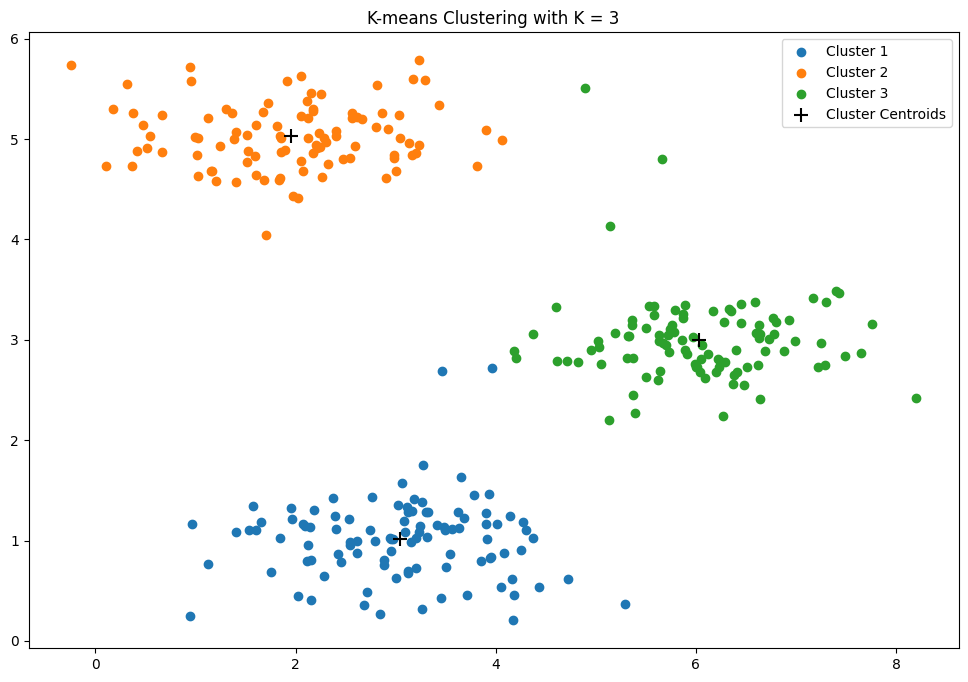

In [223]:
# Plotting the output of K-means clustering, with colors representing different clusters 
for i in range(K):
    pos = np.nonzero(idx == i)
    plt.scatter(X[pos,0],X[pos,1],label="Cluster %d" %(i+1))
plt.scatter(centroids[:,0],centroids[:,1],c='k',marker='+',s=100,label='Cluster Centroids')
plt.legend(loc='best')
plt.title("K-means Clustering with K = %d" %K)
plt.show()

# 2. K-Means Clustering: compresión de imágenes

K-Means puede usarse para comprimir imágenes. Para ello, se usa el algoritmo de K-Means para reducir el número de colores.

(128, 128, 3)


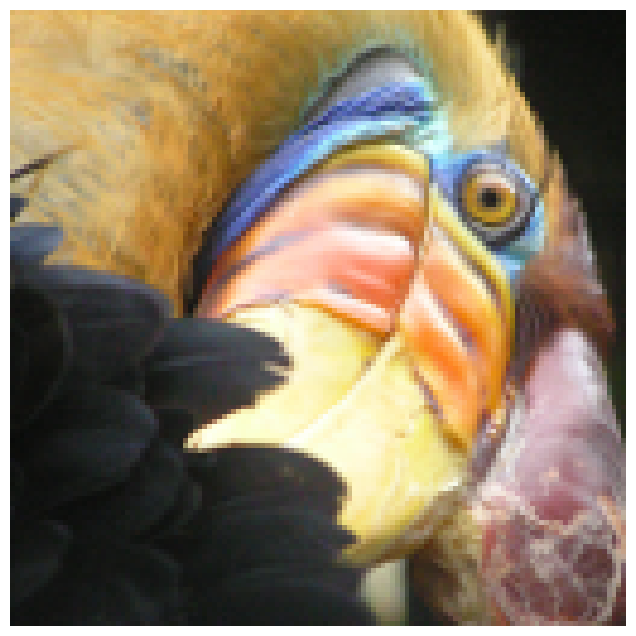

In [224]:
A = plt.imread('data/bird_small.png')
print(A.shape)
plt.imshow(A)
plt.axis('off')
plt.show()

En una imagen a color de 24 bits, cada píxel se representa como tres enteros sin signo de 8 bits que especifican los valores de intensidad del rojo, el verde y el azul ($2^8$ colores). 

$$px^{(ij)} = \begin{bmatrix} R & G & B \end{bmatrix}$$

$$Img = \begin{bmatrix} px^{(00)} & px^{(01)} & \cdots & px^{(0n)} \\ px^{(10)} & px^{(11)} & \cdots & px^{(1n)} \\ \vdots & \vdots & \ddots & \vdots \\ px^{(m0)} & px^{(m1)} & \cdots & px^{(mn)} \end{bmatrix}$$

Esta codificación suele denominarse codificación RGB. Nuestra imagen contiene miles de colores, y en esta parte del ejercicio, reduciremos el número de colores a 16 colores.

Tratamos cada píxel de la imagen original como un ejemplo de datos y utilizamos el algoritmo K-means para encontrar los 16 colores que mejor agrupan (cluster) los píxeles en el espacio RGB tridimensional. Una vez calculados los centroides de los grupos en la imagen, utilizaremos los 16 colores para sustituir los píxeles de la imagen original.

In [225]:
# Setting the constants for K-means
K = 16;
max_iters = 100;

Redimensionamos la imagen a una matriz de píxeles de tamaño m x 3, dónde m es el número de píxeles en la imagen. Cada fila de esta matriz es un píxel de la imagen original.

In [226]:
img = A.reshape(-1,3)
img.shape

(16384, 3)

Resolvemos el problema utilizando las funciones de K-Means que hemos creado anteriormente.

In [227]:
# Calling K-means to compute centroids and centroid assignments
centroids = kMeans(img,K,max_iters)
idx = closestCentroids(img,centroids)

In [228]:
# Assigning the pixel values of the new image to their cluster centroid values 
idx = idx.astype(int)
img_compress = centroids[idx]

# Reshaping ot back to 128*128*3
img_compress = img_compress.reshape(A.shape)

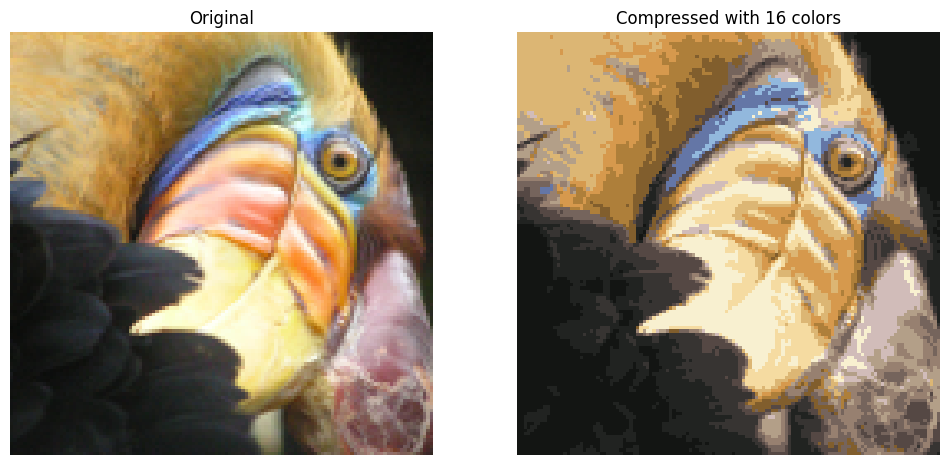

In [229]:
# Plotting both the original and compressed image
plt.subplot(1,2,1)
plt.imshow(A)
plt.title('Original')
plt.axis("off")
plt.subplot(1,2,2)
plt.imshow(img_compress)
plt.title('Compressed with 16 colors')
plt.axis("off")
plt.show()

La imagen original requiere 24 bits para cada uno de los 128×128 píxeles, lo que da un tamaño total de 128 × 128 × 24 = 393.216 bits. 

La nueva representación requiere una cierta sobrecarga de almacenamiento en forma de diccionario de 16 colores, cada uno de los cuales requiere 24 bits, pero la imagen en sí sólo necesita 4 bits por píxel. El número final de bits utilizados es, por tanto, 16 × 24 + 128 × 128 × 4 = 65.920 bits, lo que equivale a comprimir la imagen original en un factor de 6. Por tanto, hemos comprimido la imagen de forma significativa.  
  
Aunque la imagen resultante conserva la mayoría de las características de la original, también se observan algunos artefactos de compresión.

# 3. Anomaly Detection

In [230]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from scipy.stats import multivariate_normal
%matplotlib inline

# Default figure size
plt.rcParams['figure.figsize'] = (10,6)

Vamos a implementar un algoritmo para detección de anomalías y aplicarlo para detectar fallos en un servidor.

In [231]:
data = np.load('data/ad_1.npz')
print("Data files:", data.files)

X = data['X']
Xval = data['Xval']
yval = data['yval']

print("X.shape:", X.shape)
print("Xval.shape:", Xval.shape)
print("yval.shape:", yval.shape)

print("\nX[:5]:\n", X[:5], "\n")
print("Xval[:5]:\n", Xval[:5], "\n")
print("yval[:5]:\n", yval[:5])

Data files: ['X', 'yval', 'Xval']
X.shape: (307, 2)
Xval.shape: (307, 2)
yval.shape: (307,)

X[:5]:
 [[13.04681517 14.74115241]
 [13.40852019 13.7632696 ]
 [14.19591481 15.85318113]
 [14.91470077 16.17425987]
 [13.57669961 14.04284944]] 

Xval[:5]:
 [[15.79025979 14.9210243 ]
 [13.63961877 15.32995521]
 [14.86589943 16.47386514]
 [13.58467605 13.98930611]
 [13.46404167 15.63533011]] 

yval[:5]:
 [0 0 0 0 0]


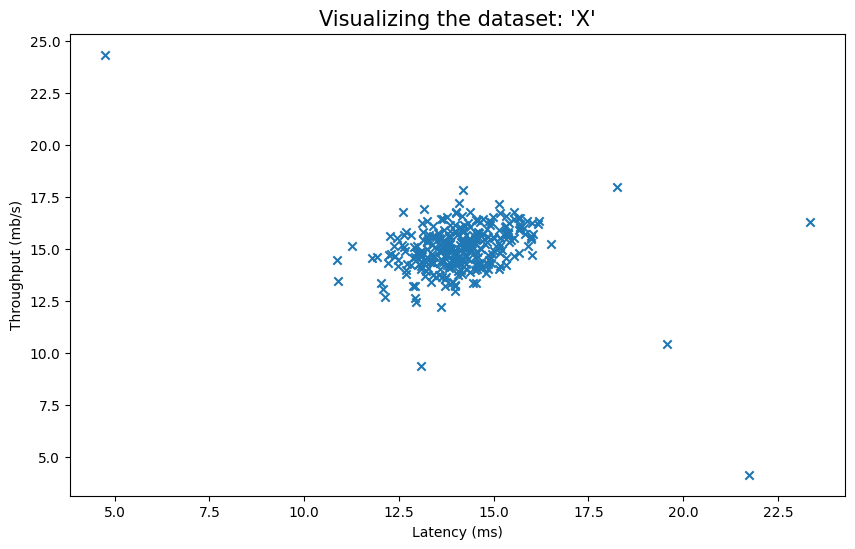

In [232]:
plt.scatter(X[:,0],X[:,1],marker='x')
plt.xlabel('Latency (ms)')
plt.ylabel('Throughput (mb/s)')
plt.title("Visualizing the dataset: 'X'", fontsize = 15)
plt.show()

El dataset tiene 307 ejemplos dos características medidas: latencia (ms) y throughput (mb/s) (medidas en un servidor).

Se hipotetiza que la mayoría de los servidores tienen un funcionamiento "normal", pero algunos de ellos pueden presentar fallos, teniendo un comportamiento "anómalo".

Este dataset, diseñado para probar algoritmos de detección de anomalías en clase, tiene los ejemplos ya particionados y distribuidos en diferentes archivos:
 - Usaremos los ejemplos de entrenamiento (X) para ajustar la distribución de probabilidad de los datos.
 - Usaremos los ejemplos de validación (Xval, yval) para determinar el umbral de probabilidad que usaremos para detectar anomalías.

### Distribución Gaussiana de las características

Para detectar anomalías, primero necsitamos ajustar un modelo a la distribución de los datos.

Dado un dataset con n características, se asume que cada característica sigue una distribución normal (gaussiana).

Para cada característica i, se debe encontrar los parámetros  $\mu_i$ (media) y $\sigma_i^2$  (varianza) que mejor se ajustan a los datos de la característica i:

$$\mu_i = \frac{1}{m} \sum_{j=1}^m x_i^{(j)}$$

$$\sigma_i^2 = \frac{1}{m} \sum_{j=1}^m (x_i^{(j)} - \mu_i)^2$$

Finalmente lo combinaremos todo en la fórula de la distribución gaussiana multivariable:

   $$ p(x ; \mu,\sigma ^2) = \frac{1}{\sqrt{2 \pi \sigma ^2}}\exp^{ - \frac{(x - \mu)^2}{2 \sigma ^2} }$$

In [233]:
def estimate_gaussian(X): 
    m, n = X.shape
        
    mu = np.sum(X, axis=0)/m
    var = np.sum((X-mu)**2, axis=0)/m
            
    return mu, var

In [234]:
def multivariate_gaussian(X, mu, var):
    k = len(mu)
    
    if var.ndim == 1:
        var = np.diag(var)
        
    X = X - mu
    p = (2* np.pi)**(-k/2) * np.linalg.det(var)**(-0.5) * \
        np.exp(-0.5 * np.sum(np.matmul(X, np.linalg.pinv(var)) * X, axis=1))
    
    return p

In [235]:
# Estimate mean and variance of each feature
mu, var = estimate_gaussian(X)              

print("Mean of each feature:", mu)
print("Variance of each feature:", var)

Mean of each feature: [14.11222578 14.99771051]
Variance of each feature: [1.83263141 1.70974533]


Con los parámetros calculados, podemos dibujar los diferentes contornos de probabilidad de los datos.

In [236]:
def visualize_fit(X, mu, var):
    
    X1, X2 = np.meshgrid(np.arange(0, 35.5, 0.5), np.arange(0, 35.5, 0.5))
    Z = multivariate_gaussian(np.stack([X1.ravel(), X2.ravel()], axis=1), mu, var)
    Z = Z.reshape(X1.shape)

    plt.plot(X[:, 0], X[:, 1], 'bx')

    if np.sum(np.isinf(Z)) == 0:
        plt.contour(X1, X2, Z, levels=10**(np.arange(-20., 1, 3)), linewidths=1)
        
    # Set the title
    plt.title("The Gaussian contours of the distribution fit to the dataset")
    # Set the y-axis label
    plt.ylabel('Throughput (mb/s)')
    # Set the x-axis label
    plt.xlabel('Latency (ms)')

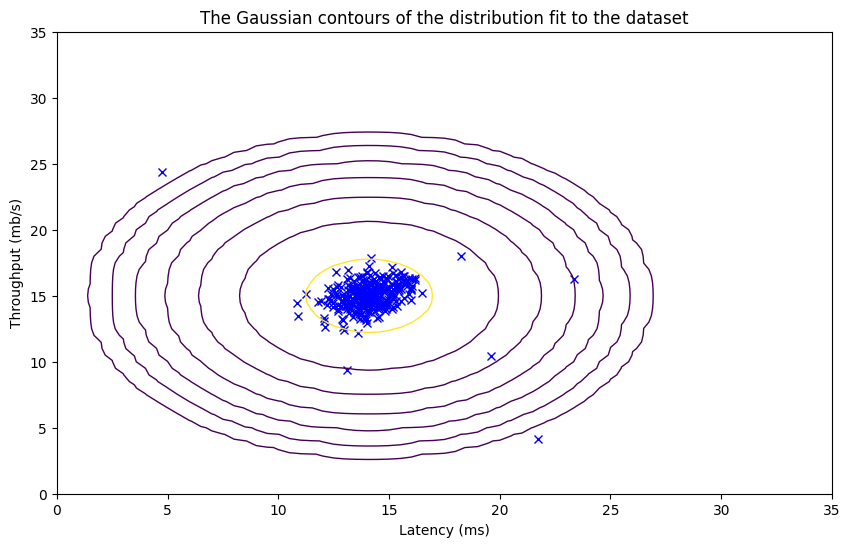

In [237]:
# Returns the density of the multivariate normal
# at each data point (row) of X_train
p = multivariate_gaussian(X, mu, var)

#Plotting code 
visualize_fit(X, mu, var)

Cada contorno representa un umbral de probabilidad.

Vemos como la mayoría de los ejemplos se concentran en los contornos de mayor probabilidad, considerándose "normales".

Aquellos ejemplos que caigan en regiones de baja probabilidad pudieran ser considerados "anómalos".

### Selección del umbral de probabilidad $\epsilon$

Vamos a usar los ejemplos de validación (Xval, yval) para determinar el umbral de probabilidad $\epsilon$ que usaremos para detectar anomalías.

In [238]:
def select_threshold(y_val, p_val): 
    best_epsilon = 0
    best_F1 = 0
    F1 = 0
    
    step_size = (max(p_val) - min(p_val)) / 1000
    
    for epsilon in np.arange(min(p_val), max(p_val), step_size):
    
        pred = p_val < epsilon
        
        tp = sum((pred == 1) & (y_val == 1))
        fp = sum((pred == 1) & (y_val == 0))
        fn = sum((pred == 0) & (y_val == 1))
        
        precision = tp/(tp+fp)
        recall = tp/(tp+fn)
        
        F1 = (2*precision*recall) / (precision+recall)
        
        if F1 > best_F1:
            best_F1 = F1
            best_epsilon = epsilon
        
    return best_epsilon, best_F1

In [239]:
p_val = multivariate_gaussian(Xval, mu, var)
epsilon, F1 = select_threshold(yval, p_val)

print('Best epsilon found using cross-validation: %e' % epsilon)
print('Best F1 on Cross Validation Set: %f' % F1)

Best epsilon found using cross-validation: 8.990853e-05
Best F1 on Cross Validation Set: 0.875000


C:\Users\icira\AppData\Local\Temp\ipykernel_14096\1232144438.py:16: RuntimeWarning: invalid value encountered in scalar divide
  precision = tp/(tp+fp)


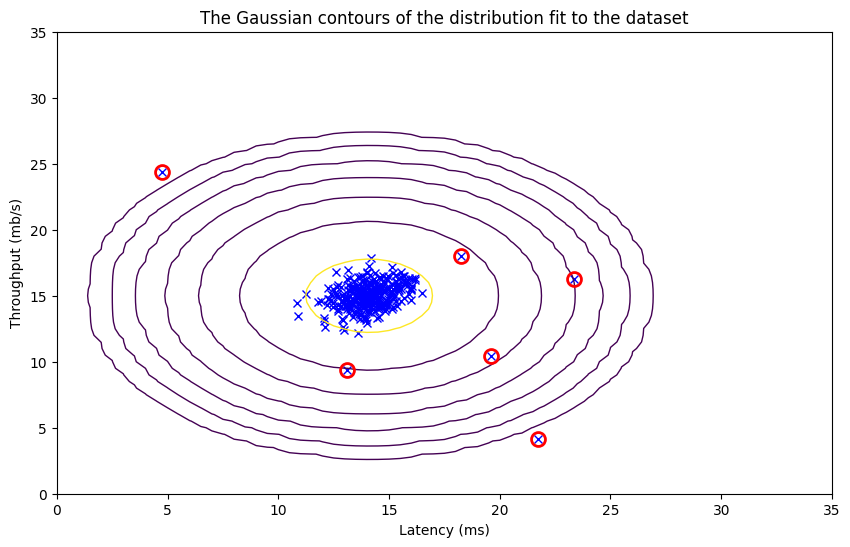

In [240]:
# Find the outliers in the training set 
outliers = p < epsilon

# Visualize the fit
visualize_fit(X, mu, var)

# Draw a red circle around those outliers
plt.plot(X[outliers, 0], X[outliers, 1], 'ro',
         markersize= 10,markerfacecolor='none', markeredgewidth=2)

# 4. Anomaly Detection: Python

In [241]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from scipy.stats import multivariate_normal
%matplotlib inline

# Default figure size
plt.rcParams['figure.figsize'] = (10,6)

In [242]:
data = np.load('data/ad_1.npz')
X = data['X']
Xval = data['Xval']
yval = data['yval']

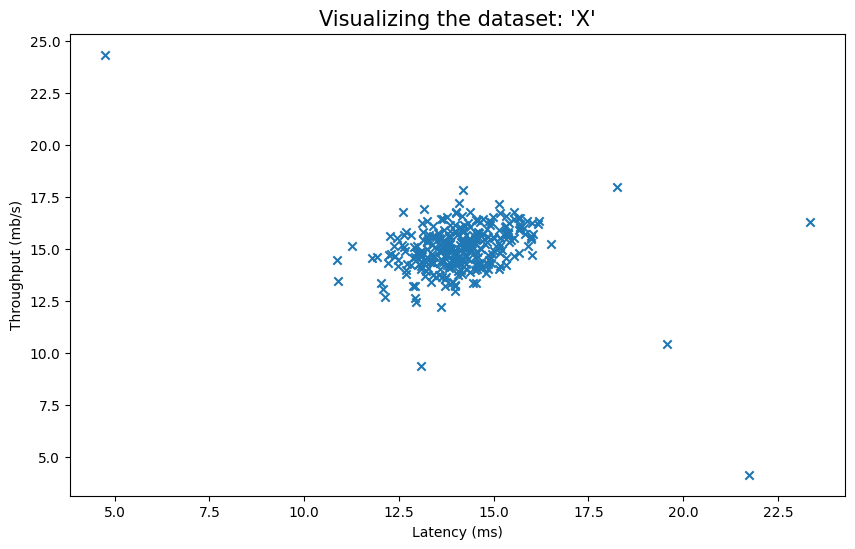

In [243]:
plt.scatter(X[:,0],X[:,1],marker='x')
plt.xlabel('Latency (ms)')
plt.ylabel('Throughput (mb/s)')
plt.title("Visualizing the dataset: 'X'", fontsize = 15)
plt.show()

In [244]:
# Calculating the mean and variance of the dataset (Gaussian Parameters)
mu = np.mean(X,axis = 0)
sigma = np.var(X,axis = 0)

In [245]:
# Initializing the grid over which gaussian contours will be modeled
x = y = np.linspace(0,35,100)
xx,yy = np.meshgrid(x,y,indexing = 'ij')
Z = np.c_[xx.flatten(),yy.flatten()]
pz = multivariate_normal.pdf(Z, mean = mu,cov= sigma).reshape(xx.shape)
contour_vals = 10** np.arange(-20,0,3,dtype=float)   

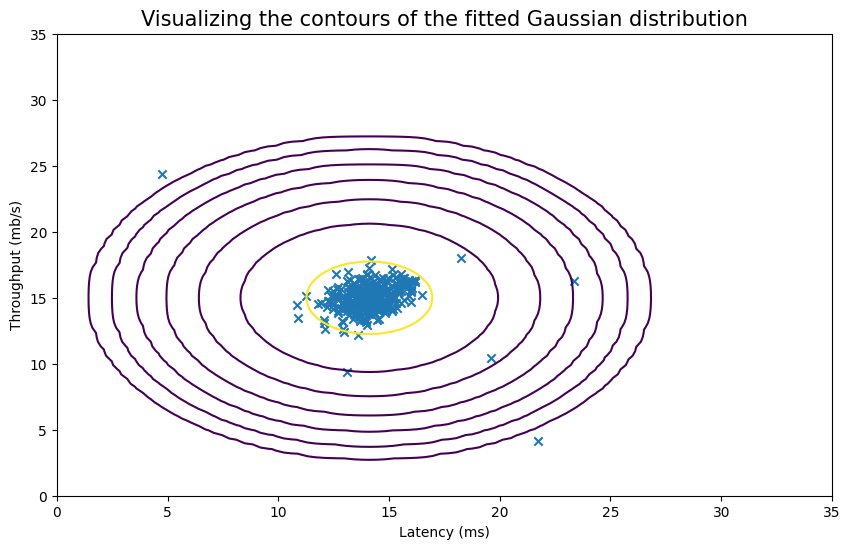

In [246]:
plt.scatter(X[:,0],X[:,1],marker='x')
plt.xlabel('Latency (ms)')
plt.ylabel('Throughput (mb/s)')
plt.title('Visualizing the contours of the fitted Gaussian distribution',
             fontsize = 15)
plt.contour(xx,yy,pz,contour_vals)
plt.show()

In [247]:
# Computes the density of the multivariate gaussian distribution at each data point (row) of X and Xval
p = multivariate_normal.pdf(X,mean = mu, cov = sigma) 
pval = multivariate_normal.pdf(Xval,mean = mu,cov = sigma)

In [248]:
# Function to select the threshold using CV set 
def selectThreshold(yval,pval):
    bestF1 = bestE = 0
    step = np.ptp(pval)/1000
    for epsilon in np.arange(np.min(pval),np.max(pval),step):
        pred = pval < epsilon
        tp = np.count_nonzero(np.logical_and(yval,pred))
        precision = tp/np.sum(pred)
        recall = tp/np.sum(yval)
        F1 = (2.0*precision*recall)/(precision + recall)
        if F1 > bestF1:
            bestF1 = F1
            bestE = epsilon
    return bestE,bestF1

In [249]:
# Computing the threshold value and the F1 score 
epsilon,F1 = selectThreshold(yval,pval)
print("Threshold value: ", epsilon)
print("F1 score: ", round(F1,4))

Threshold value:  8.990852779269493e-05
F1 score:  0.875


C:\Users\icira\AppData\Local\Temp\ipykernel_14096\3406578768.py:8: RuntimeWarning: invalid value encountered in scalar divide
  precision = tp/np.sum(pred)


In [250]:
# Finding the outliers in the training set
outliers = np.nonzero(p<epsilon)

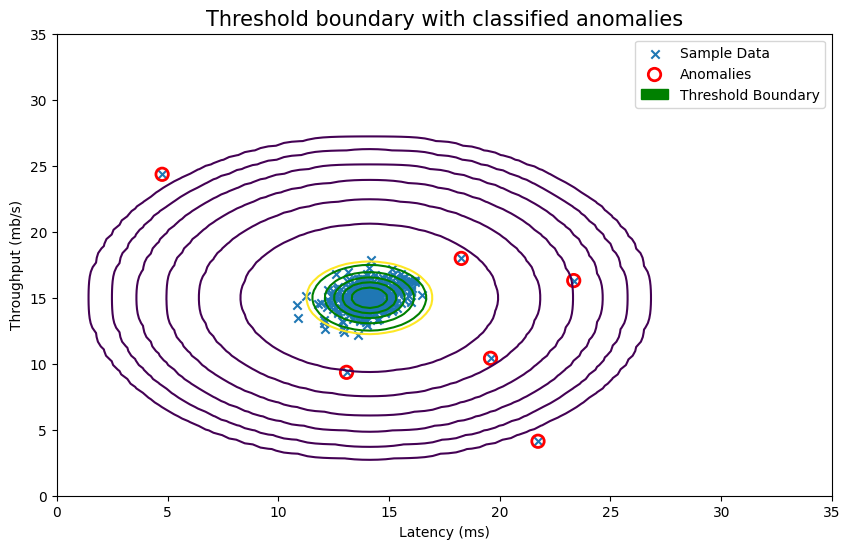

In [251]:
# Plotting the dataset, decison boundary and anomalies
P1 = plt.scatter(X[:,0],X[:,1],marker='x',label = 'Sample Data')
plt.xlabel('Latency (ms)')
plt.ylabel('Throughput (mb/s)')
plt.title('Threshold boundary with classified anomalies',
             fontsize = 15)
P2 = plt.scatter(X[outliers,0],X[outliers,1],marker = 'o',
            facecolors='none',edgecolors='r',s=80,linewidths=2,
             label = 'Anomalies')
#plt.contour(xx,yy,pz,epsilon,colors='g')
plt.contour(xx,yy,pz,colors='g')
# Plot contour of threshold
plt.contour(xx,yy,pz,contour_vals)

green_patch = mpatches.Patch(color = 'green',label = 'Threshold Boundary')

plt.legend(handles= [P1,P2,green_patch],loc = 'best')
plt.show()

# 5. Anomaly Detection: Large Dataset

In [252]:
data = np.load('data/ad_2.npz')
print("Data files:", data.files)

X = data['X']
Xval = data['Xval']
yval = data['yval']

print("X.shape:", X.shape)
print("Xval.shape:", Xval.shape)
print("yval.shape:", yval.shape)

print("\nX[:5]:\n", X[:5], "\n")
print("Xval[:5]:\n", Xval[:5], "\n")
print("yval[:5]:\n", yval[:5])

Data files: ['X', 'yval', 'Xval']
X.shape: (1000, 11)
Xval.shape: (100, 11)
yval.shape: (100,)

X[:5]:
 [[ 6.65311366e+00  1.36897016e+01  1.75528453e+01 -1.19334974e+01
  -5.75640883e+00  1.54359213e+01 -1.21367520e+01  8.22412257e+00
  -4.88402408e+00  5.34933534e+00  1.73513724e+01]
 [-5.63054206e+00 -1.89376673e+01  1.86446242e+01 -6.15582498e+00
  -2.59888637e+01  1.54095532e+01 -1.65955163e+01  9.45465367e+00
  -2.87717344e+00 -6.00942041e+00  1.92106361e+01]
 [ 9.72152507e+00 -9.98248898e+00  1.55714341e+01 -3.22242657e+01
  -5.59579923e+00  2.43213827e+01  8.32773533e-01  1.07945546e+01
   7.27574802e-01  1.03929750e+01  7.08599490e+00]
 [-4.63576572e+00 -1.07160396e+01  2.03565706e+01 -9.00209733e+00
  -4.92056907e+00 -4.26195747e+00 -1.30582878e+00  9.49980333e-01
  -8.63410656e+00  1.98445438e-01  6.77141253e-03]
 [-1.28410444e+01 -2.03883132e+01  9.49193648e+00 -7.03850017e+00
  -9.92108683e+00 -3.71610505e+00 -9.38473043e+00 -2.32553355e+00
  -1.35185624e+01  1.10070290e+0

In [253]:
# Computing the Gaussian parameters
mu = np.mean(X,axis = 0)
sigma = np.var(X,axis = 0)

In [254]:
# Computes the density of the multivariate gaussian distribution at each data point (row) of X and Xval
p = multivariate_normal.pdf(X,mean = mu, cov = sigma) 
pval = multivariate_normal.pdf(Xval,mean = mu, cov = sigma) 

In [255]:
# Finding the best threshold
epsilon,F1 = selectThreshold(yval,pval)
print("Threshold value: ", epsilon)
print("F1 score: ", round(F1,4))

Threshold value:  1.3772288907613604e-18
F1 score:  0.6154


C:\Users\icira\AppData\Local\Temp\ipykernel_14096\3406578768.py:8: RuntimeWarning: invalid value encountered in scalar divide
  precision = tp/np.sum(pred)


In [256]:
# Finding the number of anomalies
total = np.sum(p<epsilon)
print(f"Number of anomalies detected in the dataset: {total} out of {X.shape[0]}")

Number of anomalies detected in the dataset: 117 out of 1000


# 6. Principal Component Analysis

Vamos a emplear el algoritmo de PCA en imágenes para reducir su dimensionalidad.

In [257]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy import linalg
%matplotlib inline

# Default figure size
plt.rcParams['figure.figsize'] = (12,8)

In [258]:
data = np.load('data/data_pca.npz')
data.files

X = data['X']
print("X.shape:", X.shape)

print("\nX[:5]:\n", X[:5])

X.shape: (5000, 1024)

X[:5]:
 [[ -37.86631387  -45.86631387  -53.86631387 ... -110.86631387
  -111.86631387  -99.86631387]
 [   8.13368613   -0.86631387   -8.86631387 ...  -34.86631387
    -8.86631387    0.13368613]
 [ -32.86631387  -34.86631387  -36.86631387 ... -110.86631387
  -111.86631387 -111.86631387]
 [ -84.86631387  -64.86631387  -47.86631387 ...  -56.86631387
   -57.86631387  -53.86631387]
 [   2.13368613    6.13368613    5.13368613 ...   -9.86631387
     0.13368613  -14.86631387]]


El dataset se compone de 5000 imágenes de 32x32 píxeles en escala de grises, cada una de ellas representada como un vector de 1024 dimensiones.

En cada imagen se muestra la cara de una persona, centrada y ocupando la mayor parte de la imagen.

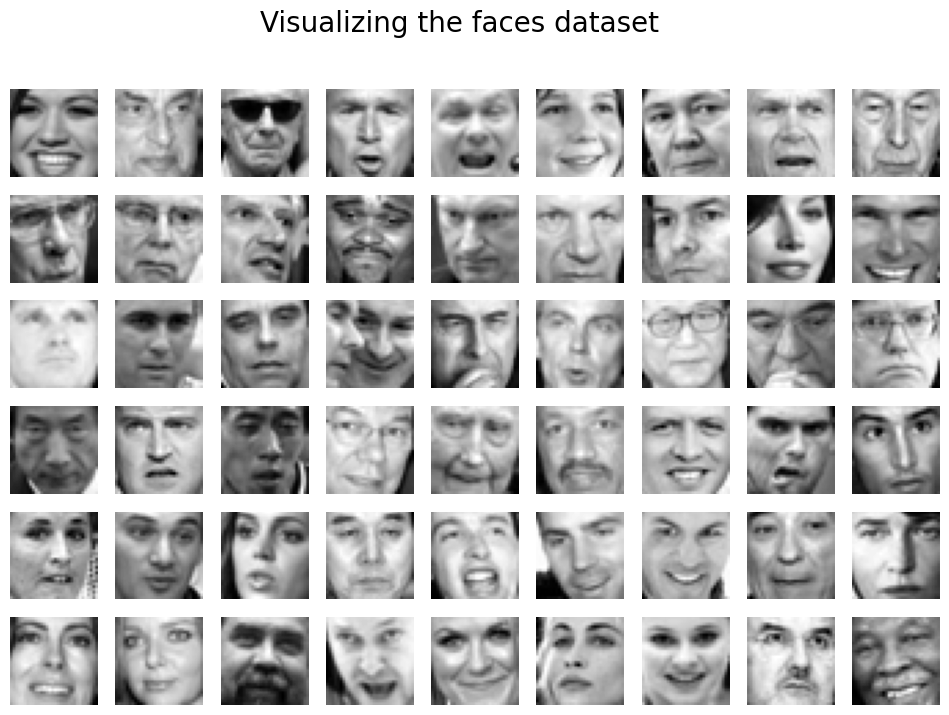

In [259]:
# Visualizing the face images
fig = plt.figure()
fig.suptitle("Visualizing the faces dataset",fontsize = 20)
indices = np.random.choice(X.shape[0],54)
for i in range(54):
    img = X[indices[i]].reshape(32,32,order ='F')
    fig.add_subplot(6,9,i+1)
    plt.imshow(img,cmap = 'gray')
    plt.axis("off")
    
plt.show()


### Normalización de los datos

A todos los efectos, podemos interpretar que tenemos 5000 ejemplos de entrenamiento, cada uno de ellos con 1024 características, una por cada píxel de la imagen.

In [260]:
# Function for mean normalizing and feature scaling 
def featureNormalize(X,mu,sigma):
    X_norm = np.apply_along_axis(np.subtract,1,X,mu)
    X_norm = np.apply_along_axis(np.divide,1,X_norm,sigma)
    return X_norm

In [261]:
# Obtaining a normalized version of X 
mu = np.mean(X,axis =0)
sigma = np.std(X,axis =0)
X_norm = featureNormalize(X,mu,sigma)

print("mu.shape:", mu.shape)
print("sigma.shape:", sigma.shape)
print("X_norm.shape:", X_norm.shape)

mu.shape: (1024,)
sigma.shape: (1024,)
X_norm.shape: (5000, 1024)


### Obtención de los componentes principales

Vamos a calcular los componentes principales de los datos. 

Primero calculamos la matriz de covarianza de los datos.

A continuación calculamos los autovalores y autovectores de la matriz de covarianza, para ello usamos la función de numpy `np.linalg.svd`.

Esta función realiza SVD (Singular Value Decomposition) y devuelve los autovalores en orden descendente. Más explicación en los siguientes enlaces de la librería [Numpy](https://numpy.org/doc/stable/reference/generated/numpy.linalg.svd.html) y el siguiente [Blog](https://towardsdatascience.com/understanding-singular-value-decomposition-and-its-application-in-data-science-388a54be95d).

In [262]:
# Function to run PCA on the dataset
def pca(X):
    m,n = X.shape
    Sigma = (1.0/m) * ((X.T).dot(X))
    U,S,V = linalg.svd(Sigma)
    
    return U,S 

In [263]:
# Runs PCA and obtains Eigenvectors U and eigenvalues S
U,S = pca(X_norm)
U.shape

(1024, 1024)

Podemos visualizar los primeros 42 autovectores, los cuales representan las direcciones principales de variación de los datos.

Cada autovector representa una dirección en el espacio de 1024 dimensiones, y cada dirección representa una combinación lineal de los píxeles originales.

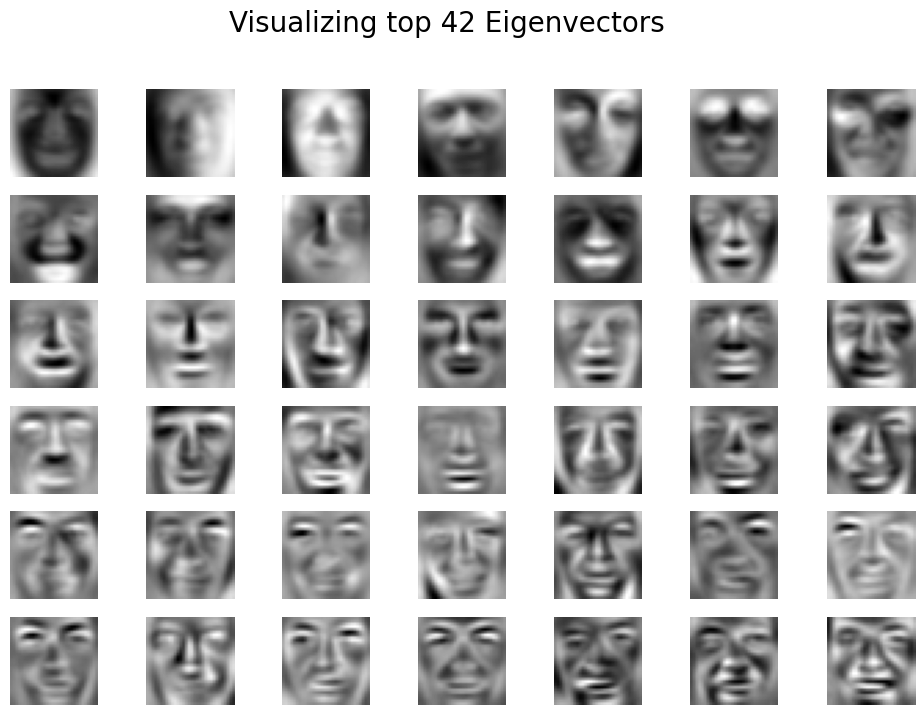

In [264]:
# Visualizing top 42 Eigenvectors
fig = plt.figure()
fig.suptitle("Visualizing top 42 Eigenvectors",fontsize = 20)
for i in range(42):
    img = U[:,i].reshape(32,32,order= 'F')
    fig.add_subplot(6,7,i+1)
    plt.imshow(img,cmap='gray')
    plt.axis('off')
plt.show()

A continuación, proyectamos los datos sobre los dos primeros autovectores.

Reduciremos la dimensión de cada imagen de 1024 a 100, proyectando cada imagen sobre los primeros 100 autovectores.

In [265]:
# Function computes the reduced dimension data using the top K eigenvectors in U
# The data gets projected to K dimensions
def projectData(X,U,K):
    U_reduce = U[:,:K]
    Z = X.dot(U_reduce)
    return Z

In [266]:
# Reducing the dimension of the data to only 100 using PCA, reduced dimension data is stored in Z
# Hence each face image is now described by only 100 features instead of 1024
K = 100
Z = projectData(X_norm,U,K)
Z.shape

(5000, 100)

In [267]:
# Function to reconstruct an approximation to the original dataset 
# using data that has been reduced to K dimensions
def recoverData(Z,U,K):
    U_reduce = U[:,:K]
    X_rec = Z.dot(U_reduce.T)
    return X_rec    

In [268]:
# Reconstructing the original data
X_rec = recoverData(Z,U,K)

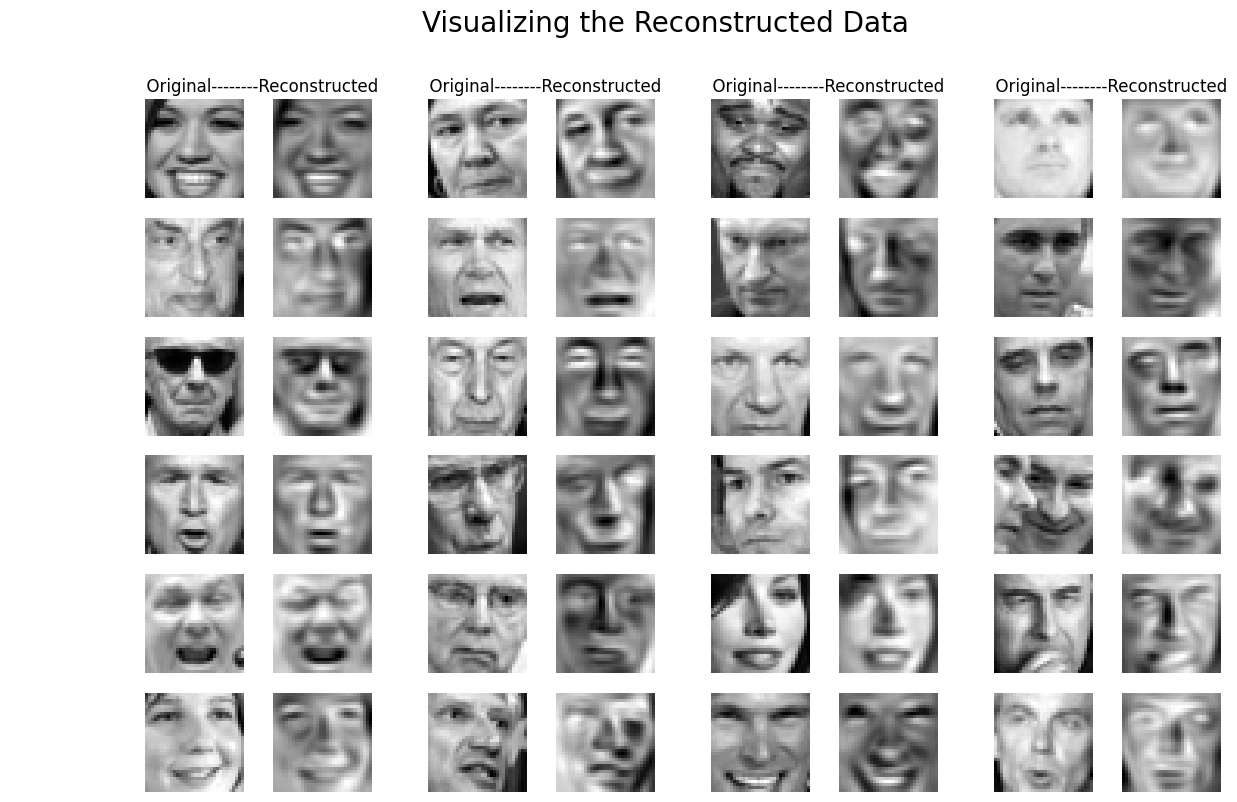

In [269]:
# Visualizing the reconstructed data
k = 0
fig = plt.figure(figsize=(14,9))
fig.suptitle("Visualizing the Reconstructed Data",fontsize = 20)
outer = gridspec.GridSpec(1,4)
for i in range(4):
    inner = gridspec.GridSpecFromSubplotSpec(6,2,
            subplot_spec = outer[i])
    for j in range(12):
        ax = plt.Subplot(fig,inner[j])
        if j == 0:
            ax.set_title("                          Original--------Reconstructed")
        if j%2 == 0:
            img = X[indices[k]].reshape(32,32,order='F')
            
        else:
            img = X_rec[indices[k]].reshape(32,32,order='F')
            k = k+1
            
        ax.imshow(img,cmap='gray')
        ax.axis('off')
        fig.add_subplot(ax)

Se realiza una recuperación aproximada de los datos y se muestran una junto a otra las imágenes del rostro original y las proyectadas. A partir de la reconstrucción, podemos observar que se mantienen la estructura general y el aspecto del rostro, mientras que se pierden los detalles finos. Se trata de una notable reducción con un factor de 10.